# House Price Prediction

This project aims to predict the house price based on the house attributes

## Steps

* Libraries Importing 
* Data Importing 
* Data Wrangling
* Data Visualization
* Model Creation
* Model parameters tuning
* Prediction

# Libraries Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

## Data Importing

In [2]:
housing_df = pd.read_csv("Ames_Housing_Data.csv")

In [3]:
housing_df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

## Data Wrangling

In [5]:
#Number of missing values per column

housing_df.isna().sum().sort_values(ascending = False)

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Fireplace Qu    1422
                ... 
MS SubClass        0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 81, dtype: int64

There are a total of 81 columns including the output column "SalePrice" which means there are 80 input variables, but ultimately not all of them might useful and as such we perform the necessary cleaning tasks

In [6]:
#Specifying columns with any percentatge of missing value in descending order (percent)

missing_cols = housing_df.isna().sum().sort_values(ascending = False)[housing_df.isna().sum().sort_values(ascending = False) > 0]/2930 * 100
missing_cols

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Cond        5.426621
Garage Finish      5.426621
Garage Yr Blt      5.426621
Garage Qual        5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
BsmtFin SF 1       0.034130
Garage Cars        0.034130
Electrical         0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 2       0.034130
Garage Area        0.034130
dtype: float64

There are 27 columns with missing values but the first few as observed have very high amount of missing values. Before any decision is made about what to do with the columns with more than 50% of its rows missing, we check the description of the different variables and what they truly signify

In [7]:
with open("Ames_Housing_Feature_Description.txt","r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

After going through the dataset documentation, we see that the first 6 attributes or variables with very large missing values actually contain information i.e the missing values themselves are an important data which could be useful to the model we are trying to build! Therefore, the NA values in the columns are changed to the "None" category. This of course is done before converting the "object" columns with categories to the "category" type.

In [8]:
missing_cols[missing_cols > 10].index

Index(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage'],
      dtype='object')

In [9]:
housing_df[['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage']] = housing_df[['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage']].fillna("None")

In [10]:
missing_cols = housing_df.isna().sum().sort_values(ascending = False)[housing_df.isna().sum().sort_values(ascending = False) > 0]/2930 * 100
missing_cols

Garage Cond       5.426621
Garage Yr Blt     5.426621
Garage Finish     5.426621
Garage Qual       5.426621
Garage Type       5.358362
Bsmt Exposure     2.832765
BsmtFin Type 2    2.764505
BsmtFin Type 1    2.730375
Bsmt Cond         2.730375
Bsmt Qual         2.730375
Mas Vnr Area      0.784983
Mas Vnr Type      0.784983
Bsmt Full Bath    0.068259
Bsmt Half Bath    0.068259
Total Bsmt SF     0.034130
BsmtFin SF 1      0.034130
Electrical        0.034130
Garage Area       0.034130
Garage Cars       0.034130
BsmtFin SF 2      0.034130
Bsmt Unf SF       0.034130
dtype: float64

Looking through the next few rows, one sees that apart from the "Garage Yr Blt" column, the first 10 columns also have "NA" values signifying the non-exixtense of the related house property! As such a similar method as done above is carried out here. 

In [11]:
missing_cols[missing_cols > 1].index

Index(['Garage Cond', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1',
       'Bsmt Cond', 'Bsmt Qual'],
      dtype='object')

In [12]:
housing_df[['Garage Cond', 'Garage Finish', 'Garage Qual',
       'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1',
       'Bsmt Cond', 'Bsmt Qual']] = housing_df[['Garage Cond', 'Garage Finish', 'Garage Qual',
       'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1',
       'Bsmt Cond', 'Bsmt Qual']].fillna("None")

In [13]:
missing_cols = housing_df.isna().sum().sort_values(ascending = False)[housing_df.isna().sum().sort_values(ascending = False) > 0]/2930 * 100
missing_cols

Garage Yr Blt     5.426621
Mas Vnr Type      0.784983
Mas Vnr Area      0.784983
Bsmt Full Bath    0.068259
Bsmt Half Bath    0.068259
Electrical        0.034130
Total Bsmt SF     0.034130
Bsmt Unf SF       0.034130
BsmtFin SF 2      0.034130
Garage Cars       0.034130
BsmtFin SF 1      0.034130
Garage Area       0.034130
dtype: float64

In [14]:
#Checking the Garage Yr Blt we have
housing_df[housing_df["Garage Yr Blt"].isna()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
27,527425090,20,RL,70.0,10500,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,ConLI,Normal,115000
119,534276360,20,RL,77.0,9320,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,400,1,2010,WD,Normal,128950
125,534427010,90,RL,98.0,13260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,1,2010,Oth,Abnorml,84900
129,534450180,20,RL,50.0,7207,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2010,WD,Normal,116500
130,534451150,30,RL,55.0,5350,Pave,None,IR1,Lvl,AllPub,...,0,None,GdWo,Shed,450,5,2010,WD,Normal,76500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,923226180,180,RM,21.0,1470,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2006,WD,Normal,73000
2916,923228130,180,RM,21.0,1533,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2006,WD,Abnorml,92000
2918,923228210,160,RM,21.0,1526,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,None,0,6,2006,WD,Normal,79500
2919,923228260,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2006,WD,Normal,90500


We observe a significant 159 rows with a missing year for the building of the garage. Since this is not something whose average value can be found, it is a better idea to drop the column

In [15]:
housing_df = housing_df.drop("Garage Yr Blt", axis=1)

In [16]:
missing_cols = housing_df.isna().sum().sort_values(ascending = False)[housing_df.isna().sum().sort_values(ascending = False) > 0]/2930 * 100
missing_cols

Mas Vnr Type      0.784983
Mas Vnr Area      0.784983
Bsmt Full Bath    0.068259
Bsmt Half Bath    0.068259
Electrical        0.034130
Garage Cars       0.034130
Garage Area       0.034130
Total Bsmt SF     0.034130
Bsmt Unf SF       0.034130
BsmtFin SF 2      0.034130
BsmtFin SF 1      0.034130
dtype: float64

In [17]:
housing_df[missing_cols.index].dtypes

Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Electrical         object
Garage Cars       float64
Garage Area       float64
Total Bsmt SF     float64
Bsmt Unf SF       float64
BsmtFin SF 2      float64
BsmtFin SF 1      float64
dtype: object

Next we change the missing values of the "object" types to "None" and that of the float64 to the rounded up value of the mean of the column. This is to utilize the rows without affecting the distribution of the values for the numeric columns. The imperativeness of replacing the values is due to the number of rows versus the potential number of columns during modelling as will be observed soon 

In [18]:
housing_df[["Mas Vnr Type", "Electrical"]] = housing_df[["Mas Vnr Type", "Electrical"]].fillna("None")
housing_df[["Mas Vnr Area", "Bsmt Full Bath", "Bsmt Half Bath", "Garage Cars",
           "Garage Area", "Total Bsmt SF", "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]] = housing_df[["Mas Vnr Area", "Bsmt Full Bath", "Bsmt Half Bath", "Garage Cars",
           "Garage Area", "Total Bsmt SF", "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]].fillna(housing_df[["Mas Vnr Area", "Bsmt Full Bath", "Bsmt Half Bath", "Garage Cars",
           "Garage Area", "Total Bsmt SF", "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]].mean())

In [19]:
missing_cols = housing_df.isna().sum().sort_values(ascending = False)[housing_df.isna().sum().sort_values(ascending = False) > 0]/2930 * 100
missing_cols

# All missing values have been eliminated

Series([], dtype: float64)

The next is to change the object columns to category columns

In [20]:
#Getting the object dtype columns

housing_df.dtypes[housing_df.dtypes == object].index

Index(['MS Zoning', 'Lot Frontage', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [21]:
# Getting all columns with the object dtype
object_df = housing_df[['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition']]

In [22]:
# Checking for each column to actually confirm that they are categories before converting the entire column to a category dtype

cat_list = []
obj_len = len(object_df)

for i in object_df.columns:
    if len(object_df[i].unique()) < obj_len:
        cat_list.append(True)
    else:
        cat_list.append(False)
        
np.array(cat_list)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

This shows that all the 43 object type columns actually contain categories and as such they will all be converted to the category dtype

In [23]:
housing_df[['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition']] = housing_df[['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition']].astype("category")

In [24]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PID              2930 non-null   int64   
 1   MS SubClass      2930 non-null   int64   
 2   MS Zoning        2930 non-null   category
 3   Lot Frontage     2930 non-null   object  
 4   Lot Area         2930 non-null   int64   
 5   Street           2930 non-null   category
 6   Alley            2930 non-null   category
 7   Lot Shape        2930 non-null   category
 8   Land Contour     2930 non-null   category
 9   Utilities        2930 non-null   category
 10  Lot Config       2930 non-null   category
 11  Land Slope       2930 non-null   category
 12  Neighborhood     2930 non-null   category
 13  Condition 1      2930 non-null   category
 14  Condition 2      2930 non-null   category
 15  Bldg Type        2930 non-null   category
 16  House Style      2930 non-null   category


## Data Visualization

This step will aid to visualize the correlation between variables and check the distribution of individual variables

In [25]:
housing_df_ext = pd.get_dummies(housing_df, drop_first=True)

In [26]:
housing_corr = housing_df_ext.corr()

In [27]:
sales_corr = housing_corr["SalePrice"].sort_values()[:-1]

In [28]:
# GETTING COLUMNS WITH AN ABSOLUTE CORRELATION GREATER THAN 0.3
len(sales_corr[abs(sales_corr) > 0.3])

38

In [29]:
sales_co = sales_corr[abs(sales_corr) > 0.3]

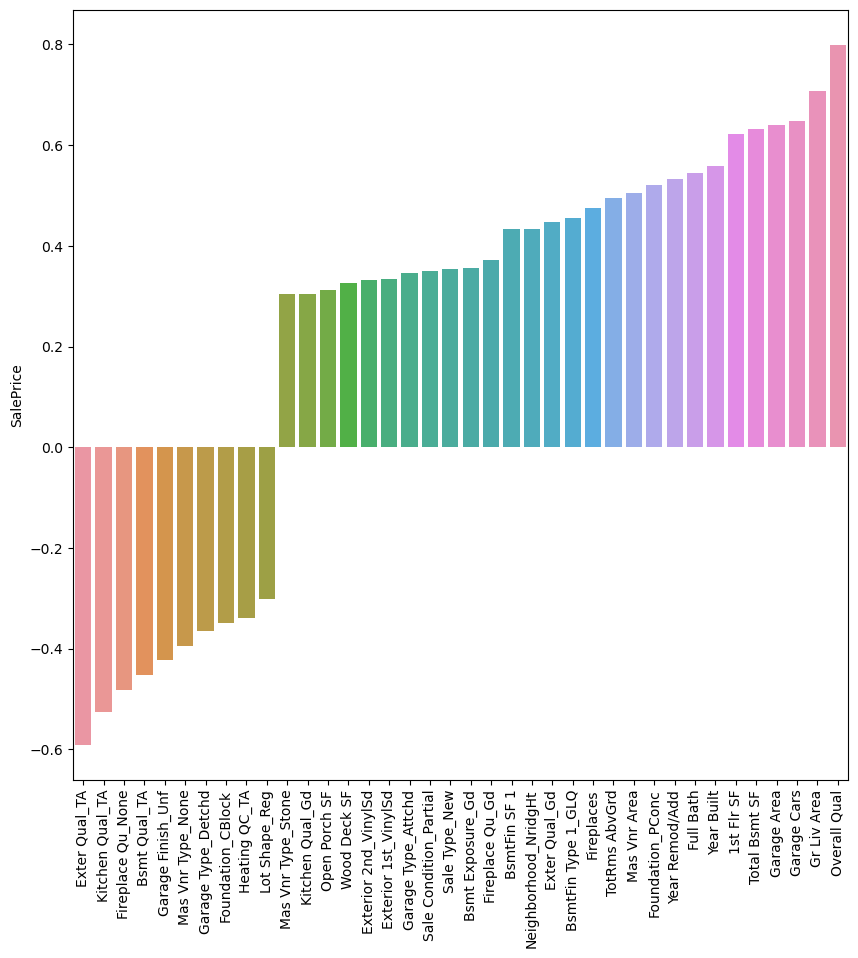

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x=sales_co.index, y=sales_co)
plt.xticks(rotation=90);

From this, we can see that the columns with the two extremes of correlation will have the strong impact on the sales of a house. We can shows this with the following plots

Text(0.5, 1.0, 'Graph of the Price of the house versus its Overall Quality')

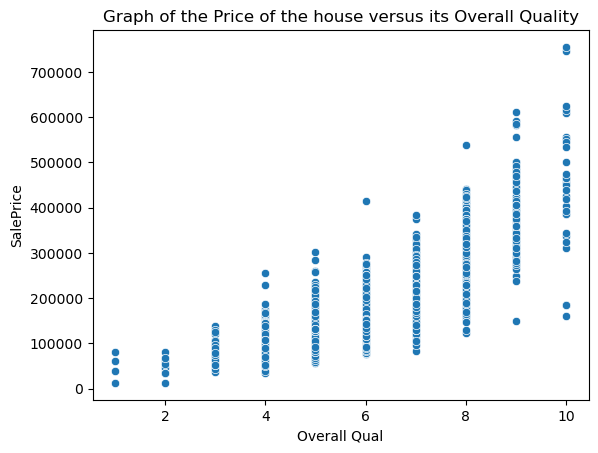

In [31]:
sns.scatterplot(data=housing_df_ext, x="Overall Qual", y="SalePrice")
plt.title("Graph of the Price of the house versus its Overall Quality")

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

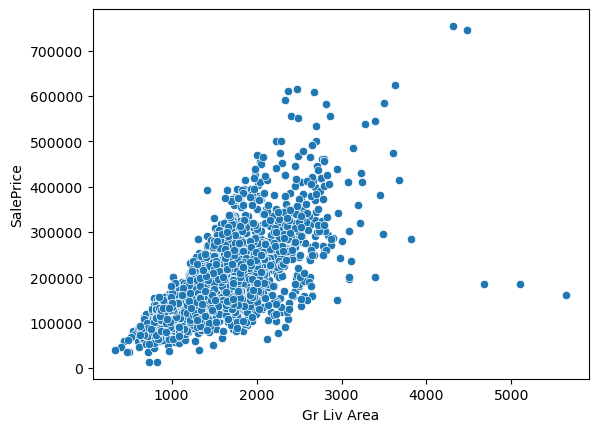

In [32]:
sns.scatterplot(data=housing_df_ext, x="Gr Liv Area", y="SalePrice")

The same is however not necessarily seen for the variables that affect it negatively

<AxesSubplot:xlabel='Exter Qual_TA', ylabel='SalePrice'>

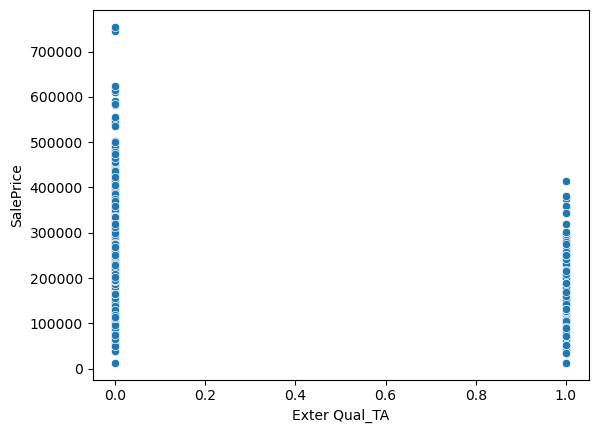

In [33]:
sns.scatterplot(data=housing_df_ext, x="Exter Qual_TA", y="SalePrice")

It is however observed that this graph might not be much of a game-changer when creating a model. One then needs to move to the next stage if modelling. 
Due to the large amount of variables and small amount of corresponding data points, it is necessary to choose only those variables that are of the utmost importance and as such Lasso Regression should best be employed when modeling.

Checking the distribution of individual numeric and categorical variables, we have the following

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

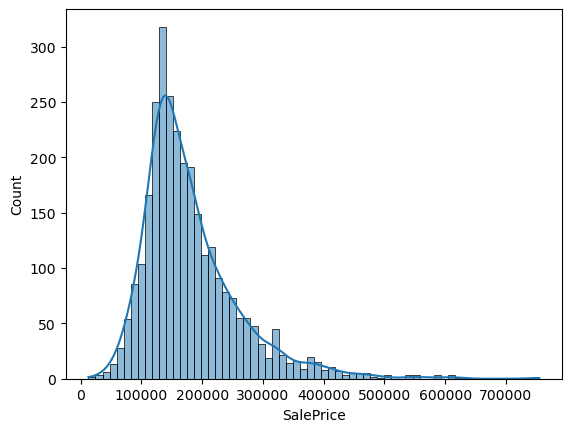

In [34]:
#Checking the distribution of the house prices
sns.histplot(data=housing_df_ext, x="SalePrice", kde=True)

# It is skewed reflecting a few very high priced house

<AxesSubplot:xlabel='Lot Area', ylabel='Count'>

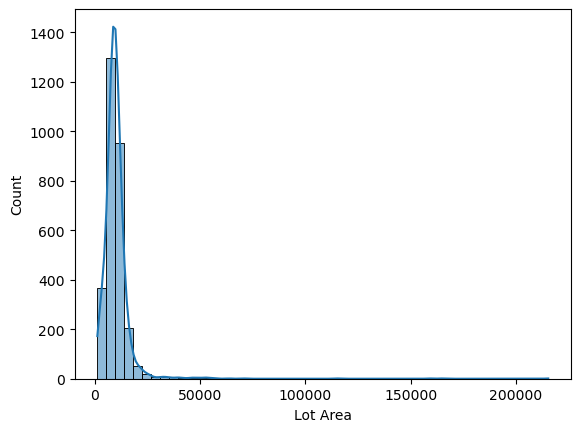

In [35]:
#Checking the distribution of the Garage Area
sns.histplot(data=housing_df_ext, x="Lot Area", kde=True, bins=50)

In [36]:
housing_df[housing_df["Lot Area"] > 50000]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,527216070,60,RL,47.0,53504,Pave,None,IR2,HLS,AllPub,...,0,None,None,None,0,6,2010,WD,Normal,538000
314,916125360,20,RL,None,57200,Pave,None,IR1,Bnk,AllPub,...,0,None,None,None,0,6,2010,WD,Normal,160000
956,916176125,20,RL,150.0,215245,Pave,None,IR3,Low,AllPub,...,0,None,None,None,0,6,2009,WD,Normal,375000
1402,905401060,20,RL,None,53227,Pave,None,IR1,Low,AllPub,...,0,None,None,None,0,3,2008,WD,Normal,256000
1498,908154235,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,None,None,0,1,2008,New,Partial,160000
1570,916125425,190,RL,None,164660,Grvl,None,IR1,HLS,AllPub,...,0,None,None,Shed,700,8,2008,WD,Normal,228950
1610,1007100110,70,I (all),None,56600,Pave,None,IR1,Low,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,103000
1637,527216080,20,RL,52.0,51974,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,6,2007,New,Partial,591587
2071,905301050,20,RL,None,115149,Pave,None,IR2,Low,AllPub,...,0,None,None,None,0,6,2007,WD,Normal,302000
2115,906426060,50,RL,None,159000,Pave,None,IR2,Low,AllPub,...,0,None,None,Shed,500,6,2007,WD,Normal,277000


This also shows a few extreme points for the Lot Area. Plotting this variable versus the sale price

<AxesSubplot:xlabel='Lot Area', ylabel='SalePrice'>

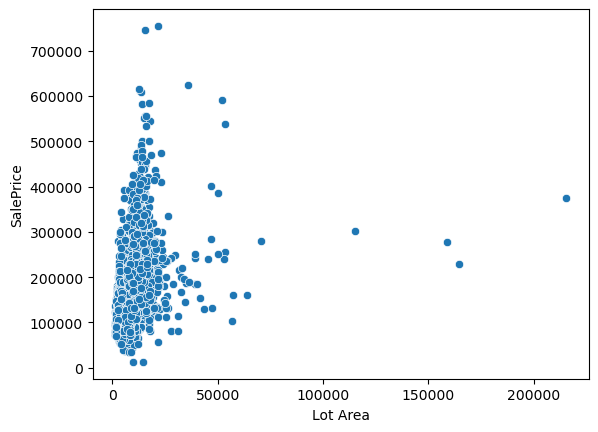

In [37]:
sns.scatterplot(x=housing_df_ext["Lot Area"], y=housing_df_ext["SalePrice"])

Taking the square root of the Lot Area and plotting it with sale price we have

Text(0.5, 0, '$Lot Area^{1/2}$')

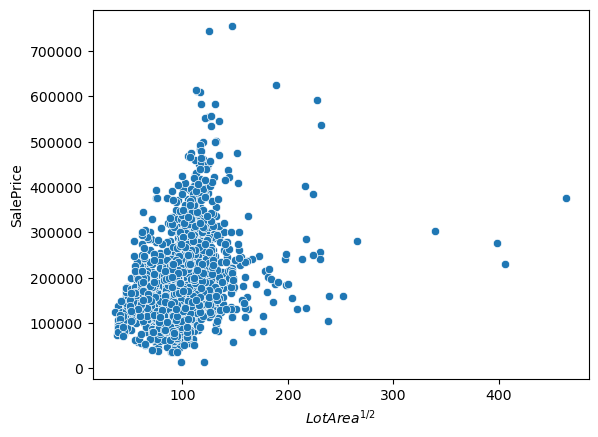

In [38]:
sns.scatterplot(x=np.sqrt(housing_df_ext["Lot Area"]), y=housing_df_ext["SalePrice"])
plt.xlabel(f"$Lot Area^{{1/2}}$")

We see a better correlation plot although not as strong as some other variables

The next step is to create the appropriate model and since we are dealing with a lot of parameters, it is best to use the LassoRegression algorithm as stated earlier. Another way is to use PCA to reduce the number of variables and run the output through a linear regression model

## Model Creation

Before the creation of the model, the data has to be scaled to prevent uneven weights from variables

In [39]:
X = housing_df_ext.drop("SalePrice", axis=1)
y = housing_df_ext["SalePrice"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=56)

In [41]:
scaler = StandardScaler() 

In [42]:
scaled_X_train = scaler.fit_transform(X_train)

In [43]:
scaled_X_test = scaler.transform(X_test)

In [44]:
lasso = Lasso(max_iter=10000)

In [45]:
params = {
    "alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
}

In [46]:
grid = GridSearchCV(param_grid=params, estimator=lasso, n_jobs=-1)

In [47]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=Lasso(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]})

In [48]:
grid.best_estimator_.alpha

1

Therefore, the best alpha value is alpha = 1. 
We then use this in a Lasso regression

In [49]:
lasso_model = Lasso(alpha=1, max_iter=10000)

In [50]:
lasso_model.fit(scaled_X_train, y_train)

Lasso(alpha=1, max_iter=10000)

Next, we take the alternative using PCA to reduce the number of variables to the square root of the total number of variables, then feeding it into a simple linear model

In [51]:
np.sqrt(housing_df_ext.shape[-1])

20.09975124224178

In [52]:
pca = PCA(n_components=20)

In [53]:
X_train_pca = pca.fit_transform(scaled_X_train)

In [54]:
X_test_pca = pca.transform(scaled_X_test)

In [55]:
linear = LinearRegression()

In [56]:
linear.fit(X_train_pca,y_train)

LinearRegression()

Next we use both models to make a prediction and compare

In [57]:
linear_pred = linear.predict(X_test_pca)

In [58]:
lasso_pred = lasso_model.predict(scaled_X_test)

In [59]:
# Result of the Linear X PCA model
np.sqrt(mean_squared_error(y_test, linear_pred))

37461.18569711519

In [60]:
# Result of the Lasso model
np.sqrt(mean_squared_error(y_test, lasso_pred))

38258.98441496492

In [61]:
# Standard deviation of the sale price
y.std()

79886.69235666493

Drawing and comparing residual plots based on the test data

In [62]:
linear_residual = linear_pred - y_test

In [63]:
lasso_residual = lasso_pred - y_test

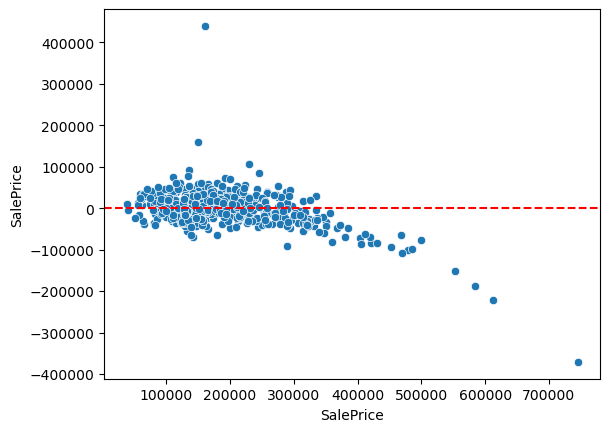

In [64]:
sns.scatterplot(x=y_test,y=linear_residual)
plt.axhline(y=0,color='red',ls='--')

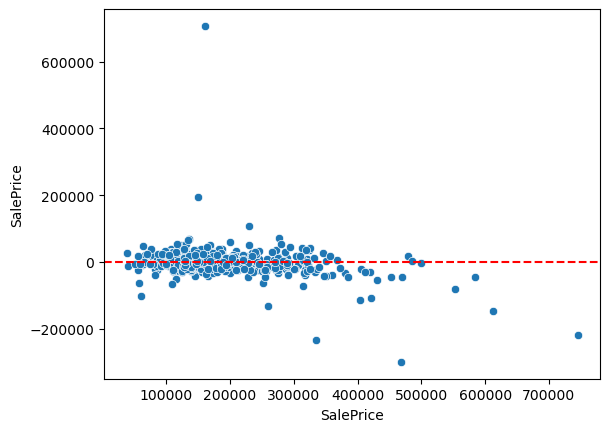

In [65]:
sns.scatterplot(x=y_test,y=lasso_residual)
plt.axhline(y=0,color='red',ls='--')

The models seems to predict very badly for some input parameters or data points. We will then try to try transformations of the output that might seemingly give a better model by raw comparison as follows using the similar steps below and comparing both model paths

In [66]:
def produce_residual(X, y, text="(Untransformed output)"):
    #split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=56)
    #scaling
    scaler = StandardScaler() 
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    # Lasso path
    lasso = Lasso(max_iter=10000)
    lasso.fit(scaled_X_train, y_train)
    # PCA x Linear Path
    pca = PCA(n_components=20)
    X_train_pca =  pca.fit_transform(scaled_X_train)
    X_test_pca = pca.transform(scaled_X_test)
    linear = LinearRegression()
    linear.fit(X_train_pca, y_train)
    #Predict
    linear_pred = linear.predict(X_test_pca)
    lasso_pred = lasso.predict(scaled_X_test)
    #residuals
    linear_residual = linear_pred - y_test
    lasso_residual = lasso_pred - y_test
    
    figs, axez = plt.subplots(nrows=1, ncols=2, figsize=(10,4), dpi=100)

    axez[0].scatter(x=y_test,y=linear_residual)
    axez[0].axhline(y=0,color='red',ls='--')

    axez[1].scatter(x=y_test,y=lasso_residual)
    axez[1].axhline(y=0,color='red',ls='--')

    figs.suptitle("Linear Vs Lasso models residual plots"+text,fontsize=16)
    figs.subplots_adjust(right=None,top=None,wspace=0.35)


    
    
    

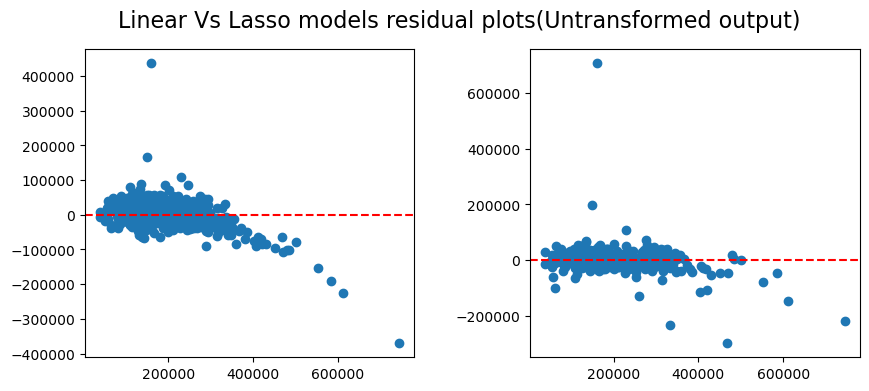

In [67]:
#Untransformed output
produce_residual(X, y)

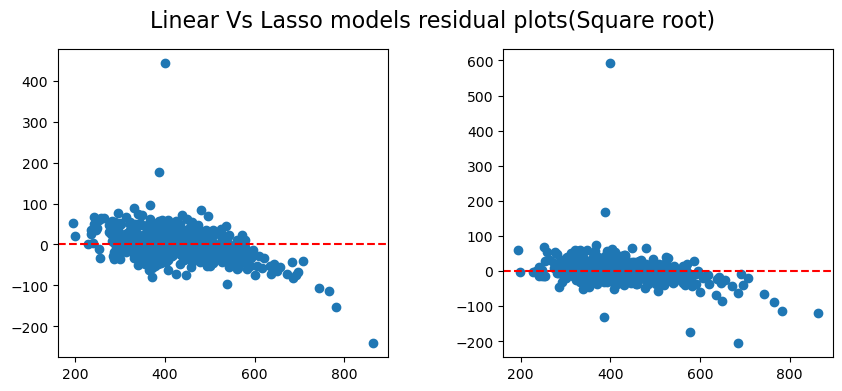

In [68]:
#Transformed via square root
produce_residual(X, y**0.5,text="(Square root)")

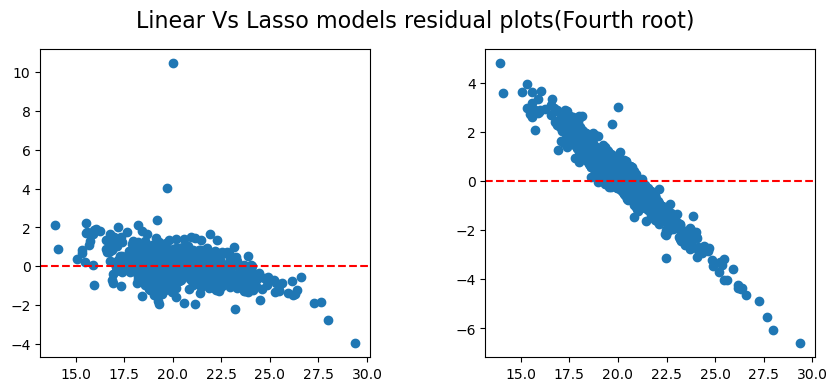

In [69]:
#Tranformed via the quad root
produce_residual(X, y**0.25, "(Fourth root)")

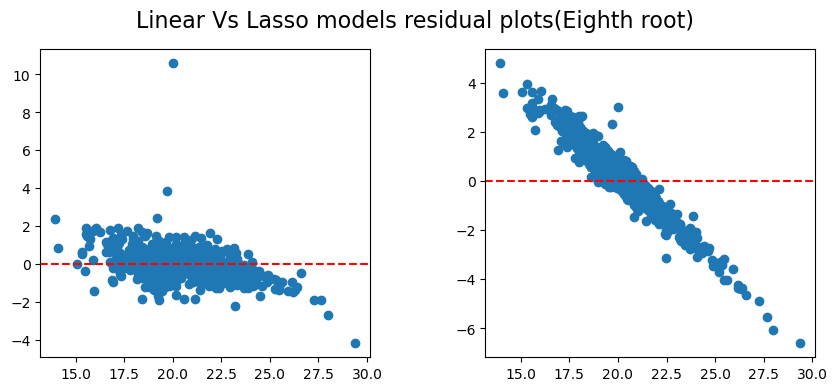

In [70]:
#Tranformed via the quad root
produce_residual(X, y**0.25, "(Eighth root)")

It is observed from the diagrams that the residual plot due to the linear model did not change while that due to the lasso model changed drastically with variable output transformation. This of course complicates the problem of unbalanced residuals in the untransformed output. The logarithimic transformation is tested hence.

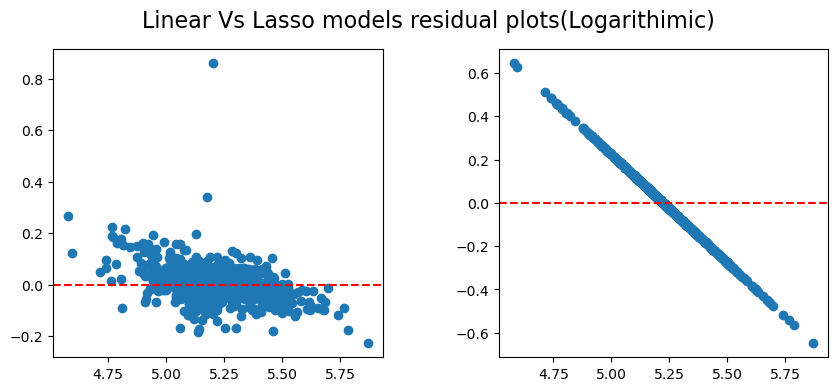

In [71]:
#Tranformed via the quad root
produce_residual(X, np.log10(y), "(Logarithimic)")

This shows a similar or even worse trend where there is a relationship between the price and residuals with higher prices having more negative residual and lower prices more positive residuals. This means this transformation has caused the lasso model to predict lower values for higher prices and higher values for lower prices. This is rather problematic.

The only viable way to exit this deadlock is to filter the dataset of very extreme values especially since their quantity are not high. For a larger dataset with such an issue, the dataset can be divided into two with outlier datapoints having a seperate model from the larger dataset. In this scenario however, we filter the outliers out completely

In [72]:
housing_df.describe()

,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,7880.017759,1.411026,1.111537,30.245361,20.860286,178.407983,455.513060,169.139595,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.500000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

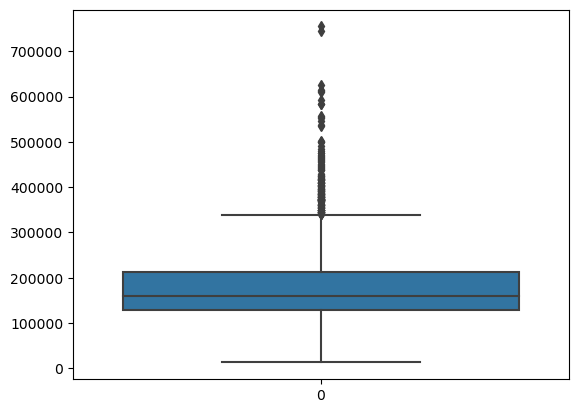

In [73]:
sns.boxplot(data=housing_df["SalePrice"])

We can see some very extreme points here. We use the 1.5(IQR) rule to eliminate the outliers

In [74]:
Q1 = np.percentile(housing_df["SalePrice"], 25, interpolation="midpoint")
Q3 = np.percentile(housing_df["SalePrice"], 75, interpolation="midpoint")
IQR = Q3 - Q1

In [75]:
acceptable_maximum = Q3 + 1.5 * IQR
acceptable_minimum = Q1 - 1.5 * IQR

In [76]:
housing_df_new = housing_df[(housing_df["SalePrice"] > acceptable_minimum) & (housing_df["SalePrice"] < acceptable_maximum)]

<AxesSubplot:>

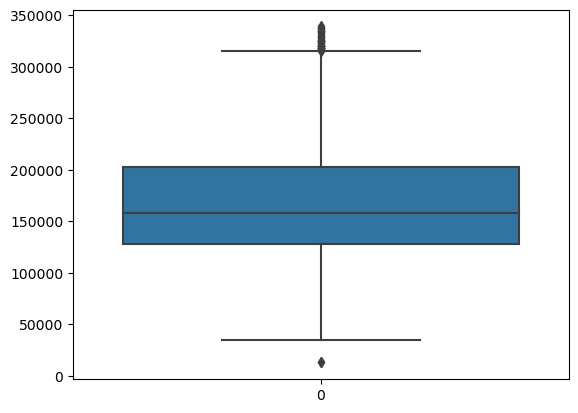

In [77]:
sns.boxplot(data=housing_df_new["SalePrice"])

Next we perform the tasks as we have before

In [78]:
housing_df_ext = pd.get_dummies(housing_df_new, drop_first=True)

In [79]:
X = housing_df_ext.drop("SalePrice", axis=1)
y = housing_df_ext["SalePrice"]

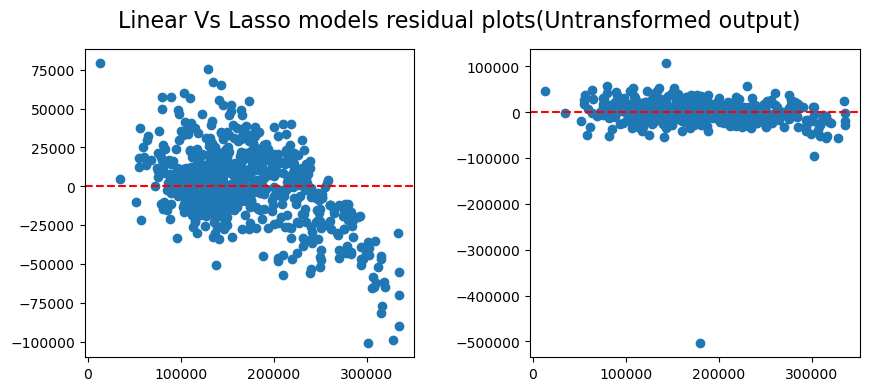

In [80]:
produce_residual(X,y)

In [81]:
X_all = scaler.fit_transform(X)

In [82]:
lasso = Lasso(max_iter=10000)

In [83]:
lasso.fit(X_all, y)

Lasso(max_iter=10000)

In [84]:
lasso_pred_all = lasso.predict(X_all)

In [85]:
lasso__residual = lasso_pred_all - y

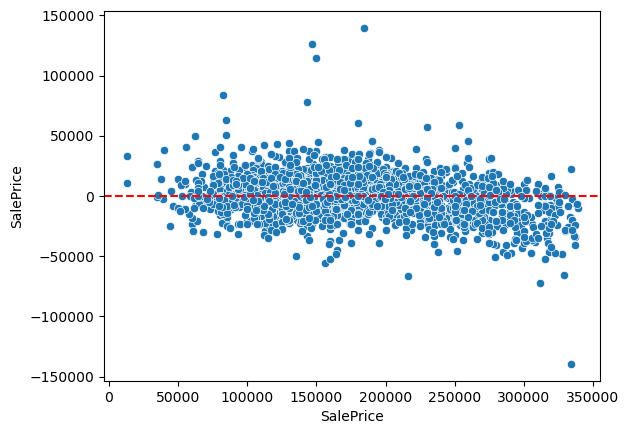

In [86]:
sns.scatterplot(x=y,y=lasso__residual)
plt.axhline(y=0,color='red',ls='--')

In [87]:
def produce_residual_2(X, y, text="(Untransformed output)"):
    #scaling
    scaler = StandardScaler() 
    scaled_X = scaler.fit_transform(X)
    # Lasso path
    lasso = Lasso(max_iter=10000)
    lasso.fit(scaled_X, y)
    # PCA x Linear Path
    pca = PCA(n_components=20)
    X_pca =  pca.fit_transform(scaled_X)
    linear = LinearRegression()
    linear.fit(X_pca, y)
    #Predict
    linear_pred = linear.predict(X_pca)
    lasso_pred = lasso.predict(scaled_X)
    #residuals
    linear_residual = linear_pred - y
    lasso_residual = lasso_pred - y
    
    figs, axez = plt.subplots(nrows=1, ncols=2, figsize=(10,4), dpi=100)

    axez[0].scatter(x=y,y=linear_residual)
    axez[0].axhline(y=0,color='red',ls='--')

    axez[1].scatter(x=y,y=lasso_residual)
    axez[1].axhline(y=0,color='red',ls='--')

    figs.suptitle("Linear Vs Lasso models residual plots"+text,fontsize=16)
    figs.subplots_adjust(right=None,top=None,wspace=0.35)


    
    
    

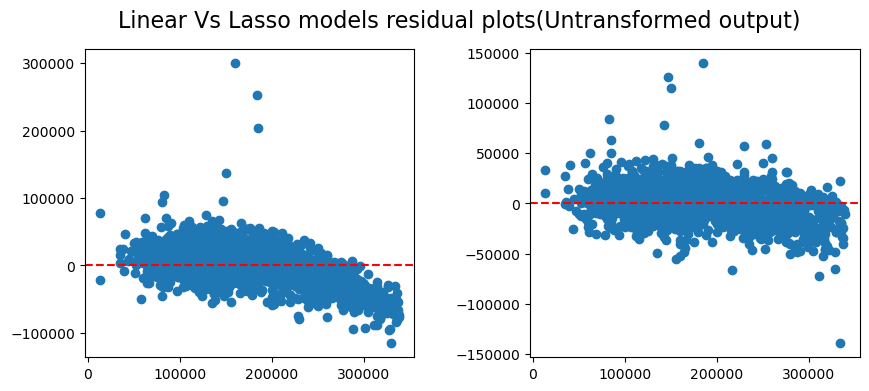

In [88]:
produce_residual_2(X, y)

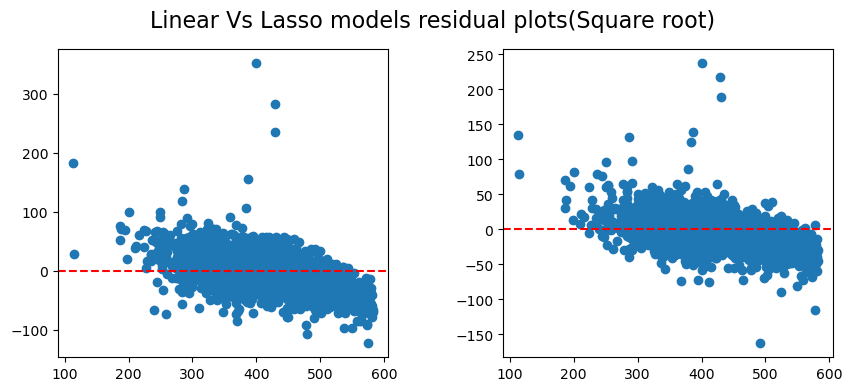

In [89]:
produce_residual_2(X, y**0.5,text="(Square root)")

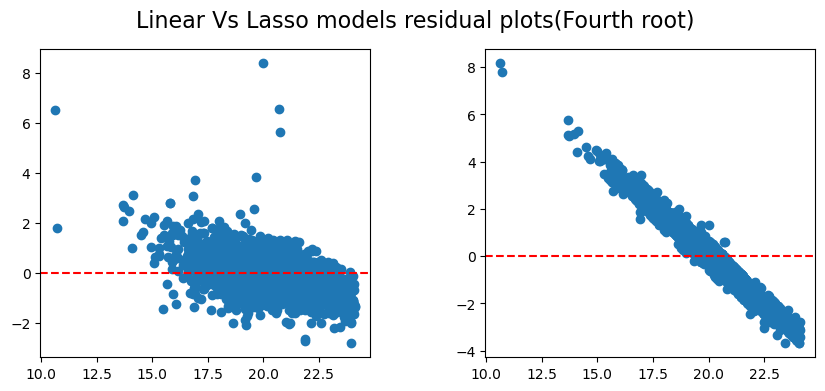

In [121]:
produce_residual_2(X, y**0.25,text="(Fourth root)")

It can be seen that there isnt a random distribution of the errors and we still get similar residual plot. We have to employ another algorithm and in this case the ensemble GradientBoost Regressor is used

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
grad_model = GradientBoostingRegressor()

In [103]:
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500, 600],
    "max_depth": [3, 5, 7, 10],
    "max_features": ["sqrt"]
    
}

In [104]:
grid_grad = GridSearchCV(estimator=grad_model, param_grid=param_grid)

In [105]:
grid_grad.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10], 'max_features': ['sqrt'],
                         'n_estimators': [100, 200, 300, 400, 500, 600]})

In [106]:
grid_grad.best_estimator_

GradientBoostingRegressor(max_depth=5, max_features='sqrt', n_estimators=400)

In [109]:
grad_pred = grid_grad.predict(X_test)

In [110]:
grad_residual = grad_pred - y_test

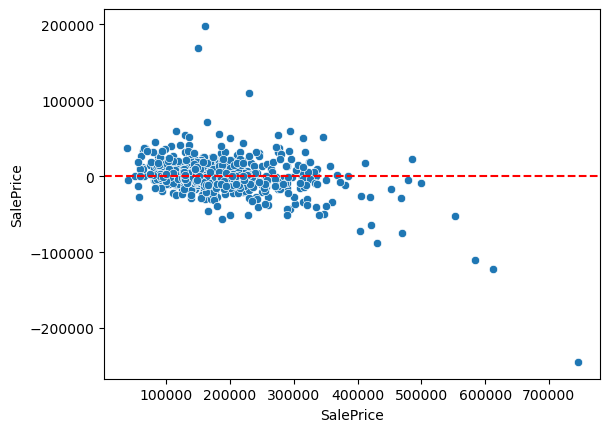

In [111]:
sns.scatterplot(x=y_test,y=grad_residual)
plt.axhline(y=0,color='red',ls='--')

In [119]:
def produce_residual_new(X, y, text="(Untransformed output)"):
    #split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=56)
    #scaling
    scaler = StandardScaler() 
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    # Lasso path
    lasso = Lasso(max_iter=10000)
    lasso.fit(scaled_X_train, y_train)
    # PCA x Linear Path
    pca = PCA(n_components=20)
    X_train_pca =  pca.fit_transform(scaled_X_train)
    X_test_pca = pca.transform(scaled_X_test)
    linear = LinearRegression()
    linear.fit(X_train_pca, y_train)
    #Gradient Boosting
    grad = GradientBoostingRegressor(max_depth=5, max_features="sqrt", n_estimators=400)
    grad.fit(X_train, y_train)
    #Predict
    linear_pred = linear.predict(X_test_pca)
    lasso_pred = lasso.predict(scaled_X_test)
    grad_pred = grad.predict(X_test)
    #residuals
    linear_residual = linear_pred - y_test
    lasso_residual = lasso_pred - y_test
    grad_residual = grad_pred - y_test
    
    figs, axez = plt.subplots(nrows=3, ncols=1, figsize=(10,10), dpi=100)

    axez[0].scatter(x=y_test,y=linear_residual)
    axez[0].axhline(y=0,color='red',ls='--')

    axez[1].scatter(x=y_test,y=lasso_residual)
    axez[1].axhline(y=0,color='red',ls='--')
    
    axez[2].scatter(x=y_test,y=grad_residual)
    axez[2].axhline(y=0,color='red',ls='--')

    figs.suptitle("Linear, Lasso and Gradient Boosting models residual plots"+text,fontsize=16)
    figs.subplots_adjust(right=None,top=None,wspace=0.35)


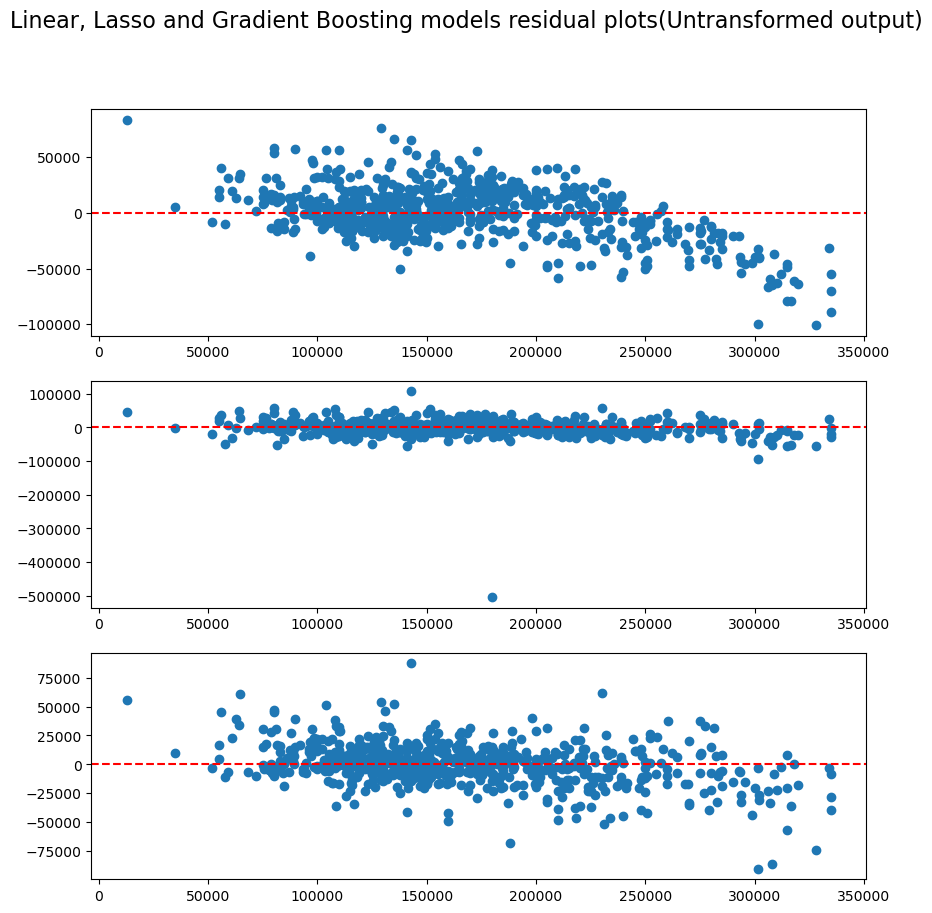

In [120]:
produce_residual_new(X,y)

We can see a better residual plot after using the Gradient Boosting Method

In [153]:
def residual_dist_new(X, y, text="(Untransformed output)"):
    #split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=56)
    #scaling
    scaler = StandardScaler() 
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    # Lasso path
    lasso = Lasso(max_iter=10000)
    lasso.fit(scaled_X_train, y_train)
    # PCA x Linear Path
    pca = PCA(n_components=20)
    X_train_pca =  pca.fit_transform(scaled_X_train)
    X_test_pca = pca.transform(scaled_X_test)
    linear = LinearRegression()
    linear.fit(X_train_pca, y_train)
    #Gradient Boosting
    grad = GradientBoostingRegressor(max_depth=5, max_features="sqrt", n_estimators=400)
    grad.fit(X_train, y_train)
    #Predict
    linear_pred = linear.predict(X_test_pca)
    lasso_pred = lasso.predict(scaled_X_test)
    grad_pred = grad.predict(X_test)
    #residuals
    linear_residual = linear_pred - y_test
    lasso_residual = lasso_pred - y_test
    grad_residual = grad_pred - y_test
    
    figs, axez = plt.subplots(nrows=3, ncols=1, figsize=(10,10), dpi=100)

    axez[0].hist(linear_residual,bins=45)

    axez[1].hist(lasso_residual,bins=45)
    
    axez[2].hist(grad_residual,bins=45)

    figs.suptitle("Linear, Lasso and Gradient Boosting models residual plots"+text,fontsize=16)
    figs.subplots_adjust(right=None,top=None,wspace=0.35)


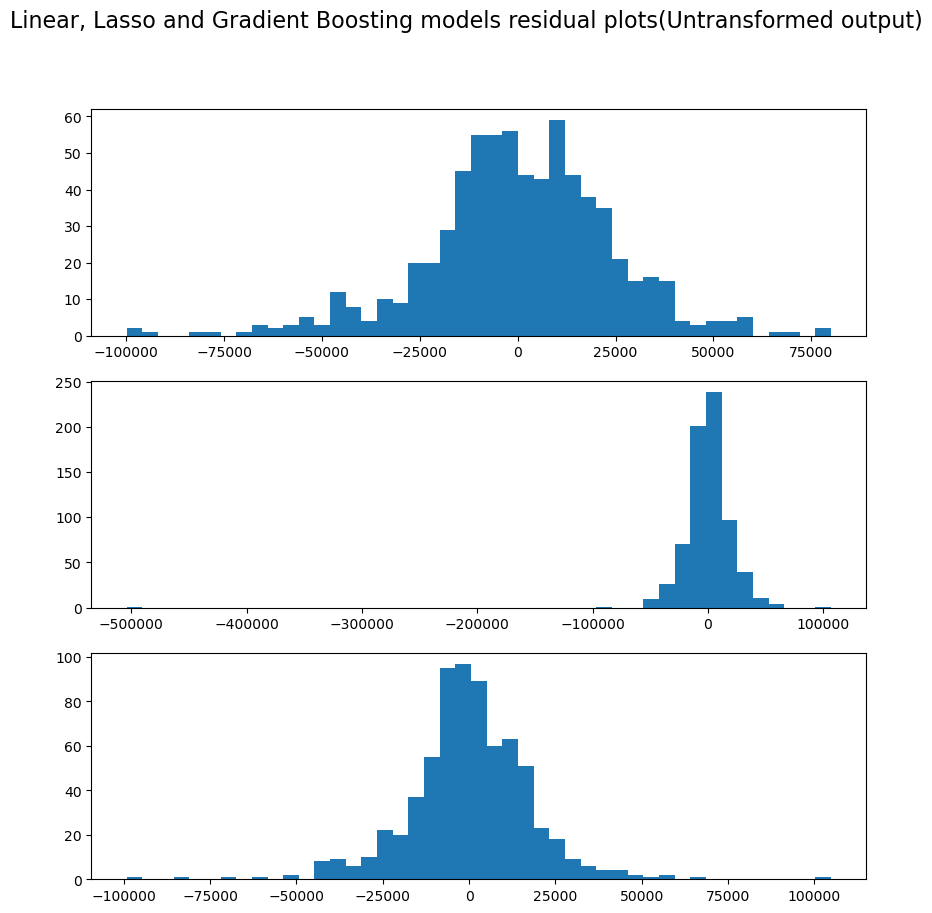

In [154]:
residual_dist_new(X,y)

It can also be observed here that the Gradient Boosting Algorithms gives a better error distribution while the first two give a left skewed distribution

In [ ]:
import scipy as sp

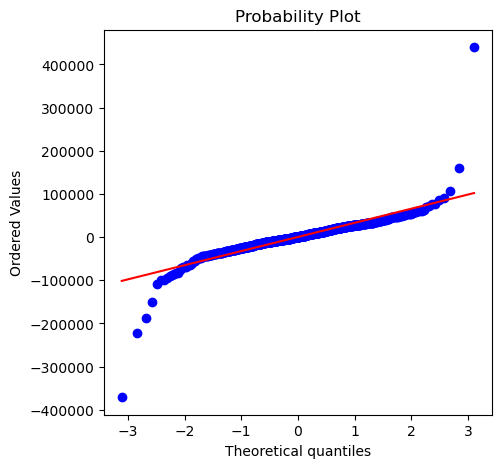

In [159]:
fig,ax = plt.subplots(figsize=(5,5),dpi=100)
_ = sp.stats.probplot(linear_residual,plot=ax)

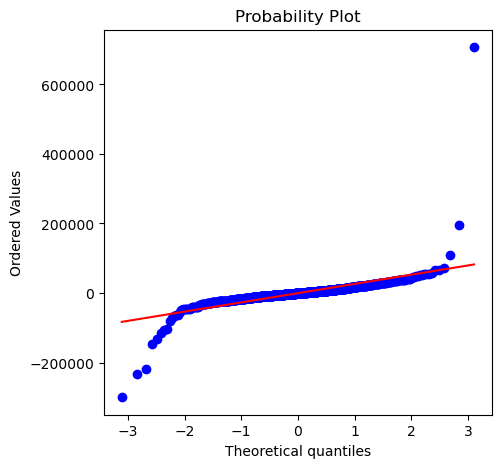

In [160]:
fig,ax = plt.subplots(figsize=(5,5),dpi=100)
_ = sp.stats.probplot(lasso_residual,plot=ax)

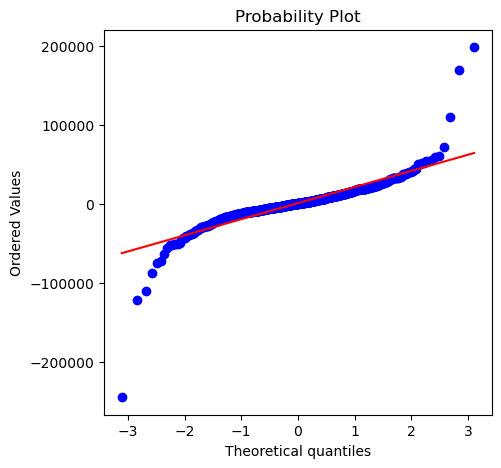

In [161]:
fig,ax = plt.subplots(figsize=(5,5),dpi=100)
_ = sp.stats.probplot(grad_residual,plot=ax)

In summary, using the Gradient Boosting Regressor gives better results. Better prediction should be possible with domain knowledge and this could help dramatically in the feature engineering process.